<a href="https://colab.research.google.com/github/KathrynKashitsyn/Quantium_Retail_data/blob/main/Quantium_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transaction and customer data

**Metadata**

**LIFESTAGE:** Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

**PREMIUM_CUSTOMER:** Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.

# Potato Chips

What to do:
- Identify customer segments based on purchase behavior
- Analyze transaction and customer data to identify trends and inconsistencies
- Develop metrics and examine sales drivers to gain insights into overall sales performance
- Create visualizations and prepare findings to formulate a clear recommendation for the client's strategy

What to explore:
- retail analytics
- specifically, Chips Category
- types of customers who purchase Chips
- purchasing behaviour within the region

Additional details:
- Examine **transaction data** on the account of **inconsistencies, missing data and  outliers**.
- In case of anomalies make the necessary changes in the dataset.
- Examine **customer data** on the account of **issues in the customer data and nulls**.  
- Merge the transaction and customer data together for the analysis
- Define the metrics – sales, drivers of sales, where the highest sales are coming from etc.
- Explore the data, create charts and graphs as well as noting any interesting trends and/or insights.
- Deep dive into customer segments – define recommendation from insights, determine which segments for targeting
- Form an overall conclusion based on your analysis. Save analysis and visualisations in the CSV file.  

# Datasets upload and  Exploration

## Transaction Data

- Analyze transaction
- Examine transaction data on the account of inconsistencies, missing data and outliers.
- Create visualizations

In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://cdn.theforage.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/QVI_transaction_data.xlsx'

#td_df - transactional data dataframe
td_df = pd.read_excel(url)
print(td_df.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [261]:
print(td_df)

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2         Smiths Crinkle Cut  Chips Chi

In [262]:
# check if columns in a DataFrame are in the correct format
print(td_df.dtypes)

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [263]:
#DATE column has incorrect format
#Convert to datetime

# Convert Excel serial number to datetime (Windows epoch: 1899-12-30)
td_df['DATE'] = pd.to_datetime(td_df['DATE'], unit='D', origin='1899-12-30')

# Verify
print(td_df['DATE'].head())

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]


In [264]:
 #Check for Data Quality Issues

 td_df.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [265]:
td_df.duplicated().sum()

np.int64(1)

In [266]:
# The result np.int64(1) indicates that DataFrame has 1 duplicate row
# Show all duplicate rows (keeping the first occurrence)
duplicates = td_df[td_df.duplicated(keep=False)]  # keep=False marks ALL duplicates
print(duplicates)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
124843 2018-10-01        107          107024  108462        45   
124845 2018-10-01        107          107024  108462        45   

                                     PROD_NAME  PROD_QTY  TOT_SALES  
124843  Smiths Thinly Cut   Roast Chicken 175g         2        6.0  
124845  Smiths Thinly Cut   Roast Chicken 175g         2        6.0  


In [267]:
# Drop duplicates (keeps the first occurrence by default)
df_clean = td_df.drop_duplicates()
print(f"Removed {len(td_df) - len(df_clean)} duplicate(s).")

Removed 1 duplicate(s).


In [268]:
df_clean = td_df
duplicates = td_df[td_df.duplicated(keep=False)]  # keep=False marks ALL duplicates
print(duplicates)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
124843 2018-10-01        107          107024  108462        45   
124845 2018-10-01        107          107024  108462        45   

                                     PROD_NAME  PROD_QTY  TOT_SALES  
124843  Smiths Thinly Cut   Roast Chicken 175g         2        6.0  
124845  Smiths Thinly Cut   Roast Chicken 175g         2        6.0  


We should check that we are looking at the right products by examining PROD_NAME.

In [269]:
# List all unique product names (like SQL DISTINCT)
print(td_df['PROD_NAME'].unique())

['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G'
 'Kettle Sensations   Siracha Lime 150g' 'Twisties Cheese     270g'
 'WW Crinkle Cut      Chicken 175g' 'Thins Chips Light&  Tangy 175g'
 'CCs Original 175g' 'Burger Rings 220g'
 'NCC Sour Cream &    Garden Chives 175g'
 'Doritos Corn Chip Southern Chicken 150g' 'Cheezels Cheese Box 125g'
 'Smiths Crinkle      Original 330g'
 'Infzns Crn Crnchers Tangy Gcamole 110g'
 'Kettle Sea Salt     And Vinegar 175g'
 'Smiths Chip Thinly  Cut Original 175g' 'Kettle Original 175g'
 'Red Rock Deli Thai  Chilli&Lime 150g' 'Pringles Sthrn FriedChicken 134g'
 'Pringles Sweet&Spcy BBQ 134g' 'Red Rock 

**Products that are chips (crisps) and one that are not**

These are sauces, dips, or snacks outside the “chips” category:

🔹 **Salsas / Dips**

Old El Paso Salsa Dip Tomato Mild 300g

Old El Paso Salsa Dip Chnky Tom Ht 300g

Old El Paso Salsa Dip Tomato Med 300g

Doritos Salsa Medium 300g

Doritos Salsa Mild 300g

Woolworths Mild Salsa 300g

Woolworths Medium Salsa 300g


🔹 **Puffs / Rings / Balls (extruded snacks, not sliced potato/corn chips)**

Twisties Cheese 270g

Twisties Chicken 270g

Twisties Cheese Burger 250g

Burger Rings 220g

Cheezels Cheese Box 125g

Cheezels Cheese 330g

Cheetos Puffs 165g

Cheetos Chs & Bacon Balls 190g

Woolworths Cheese Rings 190g

🔹 **Stacked Chips** (Pringles/Woolworths Stacked)
(arguable, but different production style — pressed/stacked, not fried slices)

Pringles (all varieties)

WW Original Stacked Chips 160g

WW Sour Cream & Onion Stacked Chips 160g

Pop’d chips (air-popped, not fried)

Cobs Popd Swt/Chlli & Sr/Cream Chips 110g

Cobs Popd Sea Salt Chips 110g

Cobs Popd Sour Crm & Chives Chips 110g

🔹 **Sunbites / Infuzions / Tyrrells “Crisps”**
(Wholegrain, veggie straws, etc. – still snacks, but not classic chips)

Sunbites Whlegrn Crisps Frch/Onin 90g

Sunbites Whlgrn Crisps Cheddr&Mstrd 90g

Infuzions Thai SweetChili PotatoMix 110g

Infuzions BBQ Rib Prawn Crackers 110g

Infzns Crn Crnchers Tangy Gcamole 110g

Infuzions SourCream&Herbs Veg Strws 110g

Infuzions Mango Chutny Papadums 70g

Tyrrells Crisps Lightly Salted 165g

Tyrrells Crisps Ched & Chives 165g

Let's remove all rows that are salsa/dip products (so we’re left with only chips & snacks).

In [270]:
drop_keywords = ["salsa", "dip"]

# Keep only rows that do NOT contain these keywords
td_df_clean = td_df[~td_df['PROD_NAME'].str.lower().str.contains("|".join(drop_keywords))]

print(td_df_clean)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [271]:
# Count occurrences of each product name (like SQL GROUP BY + COUNT)
print(td_df_clean['PROD_NAME'].value_counts())

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
Sunbites Whlegrn    Crisps Frch/Onin 90g    1432
RRD Pc Sea Salt     165g                    1431
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 104, dtype: int64


In [272]:
summary1 = td_df_clean.describe()
print('Summary1')
print(summary1)

summary2 = td_df_clean[['PROD_QTY', 'TOT_SALES']].agg(['mean', 'min', 'max'])
print('\n\n Summary2')
print(summary2)

Summary1
                                DATE      STORE_NBR  LYLTY_CARD_NBR  \
count                         245304  245304.000000    2.453040e+05   
mean   2018-12-30 01:25:33.196360448     135.053322    1.355352e+05   
min              2018-07-01 00:00:00       1.000000    1.000000e+03   
25%              2018-09-30 00:00:00      70.000000    7.001400e+04   
50%              2018-12-30 00:00:00     130.000000    1.303675e+05   
75%              2019-03-31 00:00:00     203.000000    2.030862e+05   
max              2019-06-30 00:00:00     272.000000    2.373711e+06   
std                              NaN      76.796402    8.074658e+04   

             TXN_ID       PROD_NBR       PROD_QTY      TOT_SALES  
count  2.453040e+05  245304.000000  245304.000000  245304.000000  
mean   1.351340e+05      56.054883       1.908200       7.335517  
min    1.000000e+00       1.000000       1.000000       1.700000  
25%    6.755875e+04      26.000000       2.000000       5.800000  
50%    1.351865e

In product quantity and total sales columns we can see values which stand out from min and mean values and can skew the results.

In [273]:
# Let's check for customers who bought more than 10 packs of chips

outliers = td_df_clean[
    (td_df_clean['PROD_QTY'] > 10 )
]
print(outliers.sort_values('TOT_SALES', ascending=False))

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


Quantity of 200 units is not typical for an individual to buy

In [274]:
# isolate suspicious entries
suspicious_customer = td_df_clean[(td_df_clean['LYLTY_CARD_NBR'] == 226000)]
print(suspicious_customer)

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [275]:
#clean td_df without suspicious_customer
td_df = td_df_clean.drop(td_df_clean[td_df_clean['LYLTY_CARD_NBR'] == 226000].index)

print(td_df)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
264831 2019-03-09        272          272319  270088        89   
264832 2018-08-13        272          272358  270154        74   
264833 2018-11-06        272          272379  270187        51   
264834 2018-12-27        272          272379  270188        42   
264835 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3     

In [276]:
# check for missing dates

#select all dates in a range
all_dates = pd.date_range(start=td_df['DATE'].min(), end=td_df['DATE'].max())
#Extract unique dates
existing_dates = td_df['DATE'].dt.floor('D').unique()
#check for the difference
missing_date = all_dates.difference(existing_dates)

print("Missing date:", missing_date[0].strftime('%Y-%m-%d'))

Missing date: 2018-12-25


The missing date is December 25 - Christmas. It is a standard situation as it's a holiday and shops are closed so no one buys anything.



Let's plot the line graph of time to product quantity(transactions) to visualize the demand for chips according to seasons.

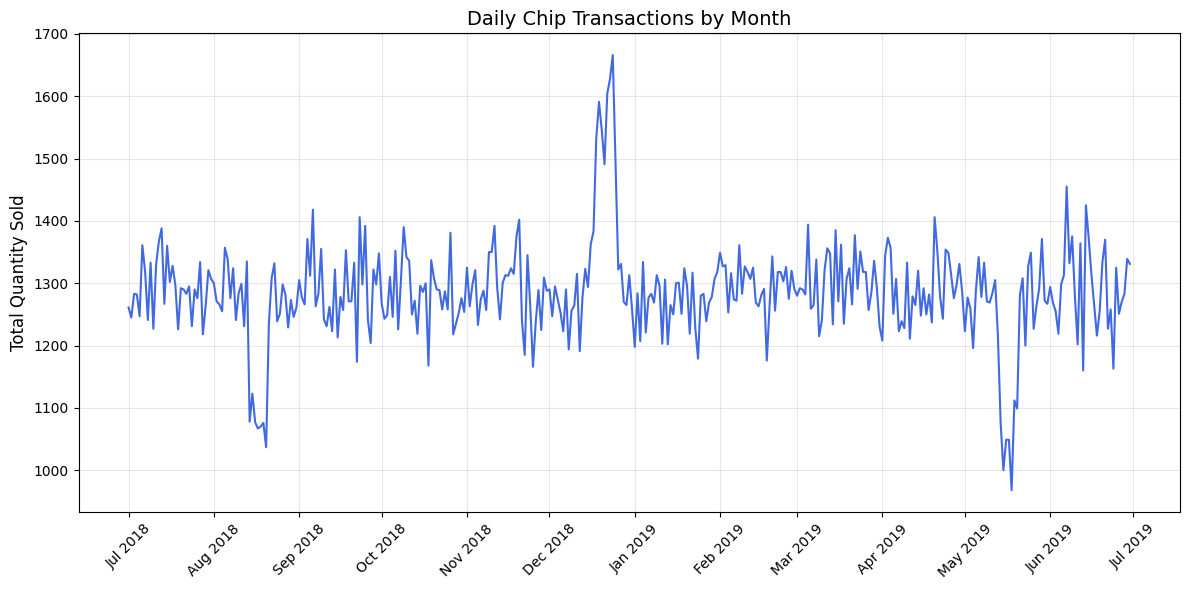

In [277]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

# Aggregate transactions by date
daily_transactions = td_df.groupby('DATE')['PROD_QTY'].sum().reset_index()

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(daily_transactions['DATE'],
         daily_transactions['PROD_QTY'],

         linestyle='-',
         color='royalblue')

# Format x-axis to show month names
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())  # Tick at start of each month
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))  # Format as "Jan 2018"

plt.title('Daily Chip Transactions by Month', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.grid(alpha=0.3)

# 4. Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that
there are zero sales on Christmas day itself. This is due to shops being closed on
Christmas day.

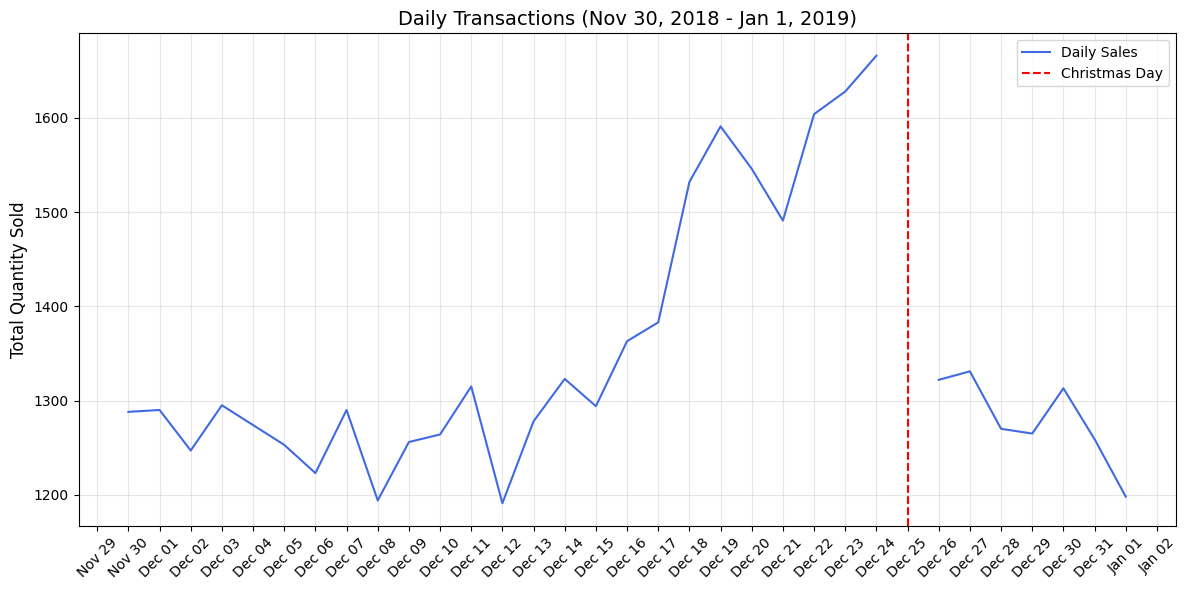

In [278]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator
import pandas as pd

# Aggregate transactions by date
daily_transactions = td_df.groupby('DATE')['PROD_QTY'].sum().reset_index()

start_date = pd.to_datetime('2018-11-30')  # Adjust start date
end_date = pd.to_datetime('2019-01-01')    # Adjust end date

# Filter the data for the selected range
mask = (daily_transactions['DATE'] >= start_date) & (daily_transactions['DATE'] <= end_date)
filtered_transactions = daily_transactions.loc[mask]

# Define missing date BEFORE using it in comparisons
missing_date = pd.to_datetime('2018-12-25')  # Example from previous analysis

# Split data into pre-gap and post-gap segments
pre_gap = filtered_transactions[filtered_transactions['DATE'] < missing_date]
post_gap = filtered_transactions[filtered_transactions['DATE'] > missing_date]

# Plot each segment separately (creates a visual gap)
plt.figure(figsize=(12, 6))
plt.plot(pre_gap['DATE'], pre_gap['PROD_QTY'], linestyle='-', color='royalblue', label='Daily Sales')
plt.plot(post_gap['DATE'], post_gap['PROD_QTY'], linestyle='-', color='royalblue')

# Format x-axis to show month names
ax = plt.gca()
ax.xaxis.set_major_locator(DayLocator(interval=1))   # Show every single day
ax.xaxis.set_major_formatter(DateFormatter('%b %d'))  # Format as "month day"

plt.title('Daily Transactions (Nov 30, 2018 - Jan 1, 2019)', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.grid(alpha=0.3)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Highlight the missing date
plt.axvline(x=missing_date, color='red', linestyle='--', label='Christmas Day')
plt.legend()

plt.tight_layout()
plt.show()

PROD_NAME column contains information with the weight of each pack. We can extract this data to plot histogram of PACK_SIZE

In [279]:
import re

# 1. Extract pack size (in grams) from PROD_NAME
def extract_size(name):
    match = re.search(r'(\d+)g\b', name)  # Finds numbers followed by 'g'
    return int(match.group(1)) if match else None

td_df['PACK_SIZE'] = td_df['PROD_NAME'].apply(extract_size)

# 2. Count transactions by pack size
size_counts = td_df['PACK_SIZE'].value_counts().sort_index()
print(size_counts)

PACK_SIZE
70.0      1507
90.0      3008
110.0    22387
125.0     1454
134.0    25102
135.0     3257
150.0    37267
160.0     2970
165.0    15297
170.0    19983
175.0    64929
180.0     1468
190.0     2995
200.0     4473
210.0     3167
220.0     1564
250.0     3169
270.0     6285
330.0    12540
380.0     6416
Name: count, dtype: int64


The largest size is 380g and the smallest size is 70g - seems sensible!

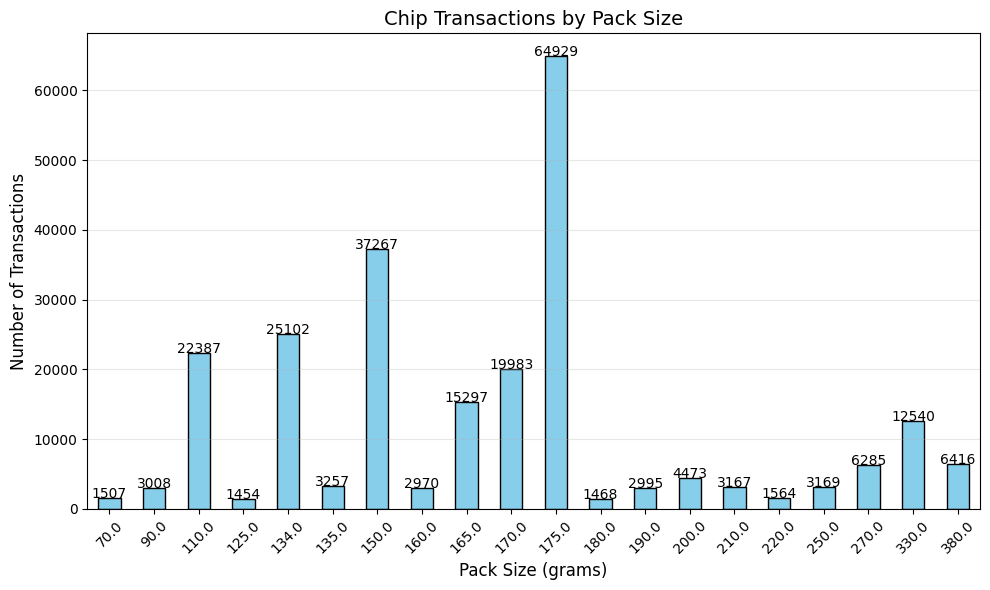

In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# 3. Plot histogram
plt.figure(figsize=(10, 6))
size_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# 4. Format plot
plt.title('Chip Transactions by Pack Size', fontsize=14)
plt.xlabel('Pack Size (grams)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(size_counts):
    plt.text(i, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()

Pack sizes created look reasonable and now to create brands, we can use the first word in PROD_NAME to work out the brand name

#Brand and product name normalization

In [281]:
# ---- Step 1: Extract brand (first word) ----
td_df["BRAND"] = td_df["PROD_NAME"].str.split().str[0].str.upper()
# ---- Step 2: Count frequency of brands ----
brand_counts = td_df["BRAND"].value_counts().reset_index()
brand_counts.columns = ["BRAND", "N"]

print(brand_counts)

         BRAND      N
0       KETTLE  41288
1       SMITHS  25952
2     PRINGLES  25102
3      DORITOS  22041
4        THINS  14075
5          RRD  11894
6    INFUZIONS  11057
7           WW  10320
8         COBS   9693
9     TOSTITOS   9471
10    TWISTIES   9454
11    TYRRELLS   6442
12       GRAIN   6272
13     NATURAL   6050
14    CHEEZELS   4603
15         CCS   4551
16         RED   4427
17      DORITO   3183
18      INFZNS   3144
19       SMITH   2963
20     CHEETOS   2927
21       SNBTS   1576
22      BURGER   1564
23  WOOLWORTHS   1516
24     GRNWVES   1468
25    SUNBITES   1432
26         NCC   1419
27      FRENCH   1418


Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red Rock Deli chips. Let’s combine these together.

In [282]:
import re

# ---- STEP 1: Normalize brand names ----
brand_map = {
    r"^smiths?|smith": "Smiths",
    r"^natural chip.*": "Natural Chip Co",
    r"^rrd|red rock deli": "Red Rock Deli",
    r"^ww|woolworths": "Woolworths",
    r"^dorito[s]?": "Doritos",
    r"^ccs|ncc": "CCs",
    r"^grain waves|grnwves": "Grain Waves",
    r"^thins": "Thins",
    r"^kettle": "Kettle",
    r"^pringles": "Pringles",
    r"^cobs": "Cobs",
    r"^twisties": "Twisties",
    r"^cheezels": "Cheezels",
    r"^cheetos": "Cheetos",
    r"^sunbites|snbts": "Sunbites",
    r"^infuzions|infzns": "Infuzions",
    r"^tyrrells": "Tyrrells",
    r"^tostitos": "Tostitos",
    r"^french fries": "French Fries"
}

def normalize_brand(name: str) -> str:
    n = name.lower().strip()
    for pattern, brand in brand_map.items():
        if re.match(pattern, n):
            return brand
    return "Other"

td_df['BRAND'] = td_df['PROD_NAME'].apply(normalize_brand)

td_df['BRAND'].value_counts().reset_index()

,BRAND,count
0,Kettle,41288
1,Smiths,28915
2,Doritos,25224
3,Pringles,25102
4,Red Rock Deli,16321
5,Infuzions,14201
6,Thins,14075
7,Woolworths,11836
8,Cobs,9693
9,Tostitos,9471


## Customer data

- Examine customer data on the account of issues in the customer data and nulls.
- Merge the transaction and customer data together for further analysis

In [283]:
url = 'https://cdn.theforage.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/QVI_purchase_behaviour.csv'

#pb_df - purchase behaviour dataframe
pb_df = pd.read_csv(url)
print(pb_df.head())


   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream


In [284]:
print(pb_df)

       LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0                1000   YOUNG SINGLES/COUPLES          Premium
1                1002   YOUNG SINGLES/COUPLES       Mainstream
2                1003          YOUNG FAMILIES           Budget
3                1004   OLDER SINGLES/COUPLES       Mainstream
4                1005  MIDAGE SINGLES/COUPLES       Mainstream
...               ...                     ...              ...
72632         2370651  MIDAGE SINGLES/COUPLES       Mainstream
72633         2370701          YOUNG FAMILIES       Mainstream
72634         2370751          YOUNG FAMILIES          Premium
72635         2370961          OLDER FAMILIES           Budget
72636         2373711   YOUNG SINGLES/COUPLES       Mainstream

[72637 rows x 3 columns]


In [285]:
# check if columns in a DataFrame are in the correct format
print(pb_df.dtypes)

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


In [286]:
#Check for Data Quality Issues

pb_df.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [287]:
pb_df.duplicated().sum()

np.int64(0)

# Merger

In [288]:
# Merge the dataframes on loyalty card number
merged_df = pd.merge(
    td_df,
    pb_df,
    on='LYLTY_CARD_NBR',
    how='left'  # keeps all transactions even if customer info is missing
)

# Verify the merge
print(merged_df.head())

        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0 2018-10-17          1            1000       1         5   
1 2019-05-14          1            1307     348        66   
2 2019-05-20          1            1343     383        61   
3 2018-08-17          2            2373     974        69   
4 2018-08-18          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0    Natural Chip        Compny SeaSalt175g         2        6.0      175.0   
1                  CCs Nacho Cheese    175g         3        6.3      175.0   
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170.0   
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0      175.0   
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8      150.0   

             BRAND               LIFESTAGE PREMIUM_CUSTOMER  
0  Natural Chip Co   YOUNG SINGLES/COUPLES          Premium  
1              CCs  MIDAGE SINGLES

In [289]:
print(merged_df)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
245297 2019-03-09        272          272319  270088        89   
245298 2018-08-13        272          272358  270154        74   
245299 2018-11-06        272          272379  270187        51   
245300 2018-12-27        272          272379  270188        42   
245301 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3   

In [290]:
#Check for NULLs
merged_df.isnull().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
PACK_SIZE,6064
BRAND,0


In [291]:
# check for missing customer data
merged_df['LIFESTAGE'] = merged_df['LIFESTAGE'].fillna('UNKNOWN')
merged_df['PREMIUM_CUSTOMER'] = merged_df['PREMIUM_CUSTOMER'].fillna('UNKNOWN')

Data analysis on customer segments:

• Who spends the most on chips (total sales), describing customers by lifestage and how premium their
general purchasing behaviour is

• How many customers are in each segment

• How many chips are bought per customer by segment

• What’s the average chip price by customer segment

In [292]:
#Who spends the most on chips (total sales), describing customers by lifestage
#how premium their general purchasing behaviour is
spending_analysis = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_sales=('TOT_SALES', 'sum'),
    transaction_count=('TXN_ID', 'count'),
   ).reset_index()
# Sort by highest spending
spending_analysis = spending_analysis.sort_values('total_sales', ascending=False)
print(spending_analysis)

                 LIFESTAGE PREMIUM_CUSTOMER  total_sales  transaction_count
6           OLDER FAMILIES           Budget    156096.75              21363
19   YOUNG SINGLES/COUPLES       Mainstream    147244.20              19472
13                RETIREES       Mainstream    144677.55              19870
15          YOUNG FAMILIES           Budget    129151.15              17650
9    OLDER SINGLES/COUPLES           Budget    127279.80              17061
10   OLDER SINGLES/COUPLES       Mainstream    124089.50              16948
11   OLDER SINGLES/COUPLES          Premium    123147.55              16480
12                RETIREES           Budget    105586.10              14156
7           OLDER FAMILIES       Mainstream     96059.95              13169
14                RETIREES          Premium     91013.25              12177
16          YOUNG FAMILIES       Mainstream     85919.65              11863
1   MIDAGE SINGLES/COUPLES       Mainstream     84500.25              11048
17          

### Key Findings on Customer Groups

- Older Families on a Budget spend the most on chips overall $168,363

- Young Singles/Couples Mainstream and Retirees Mainstream follow closely 157,622 and 155,677 respectively


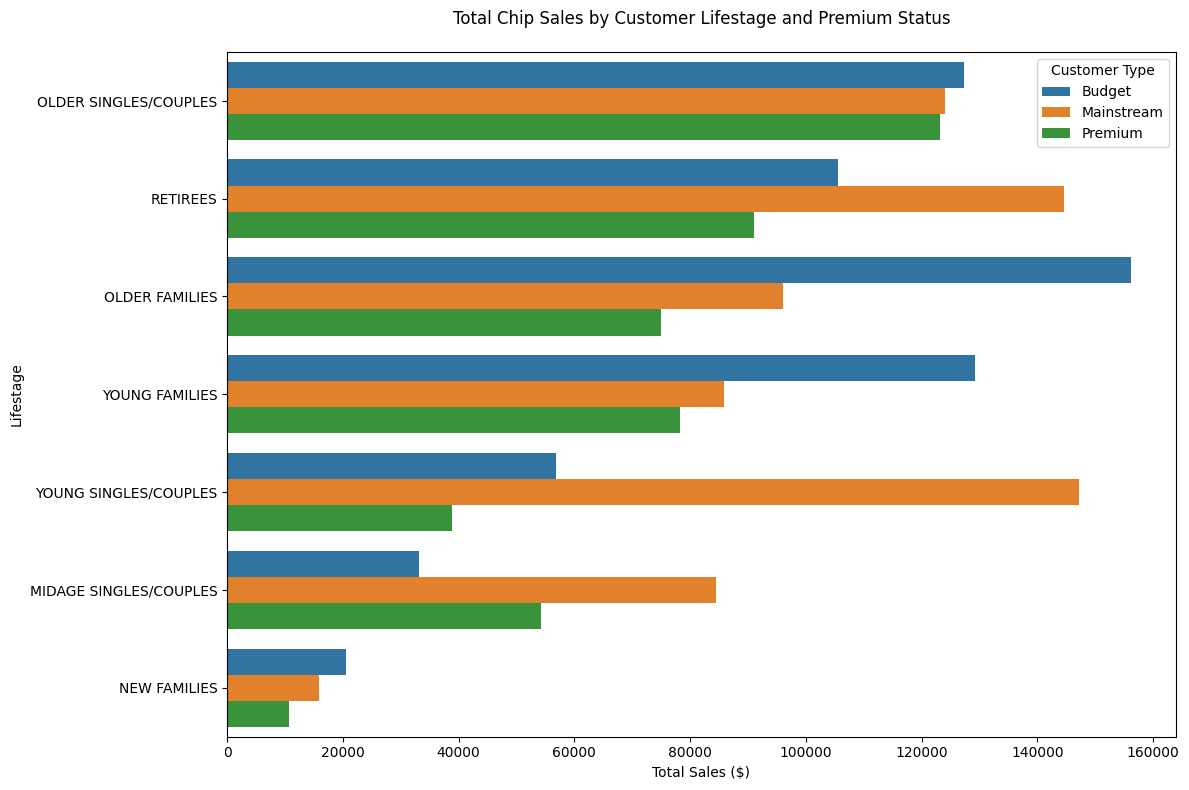

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(data=spending_analysis,
            x='total_sales',
            y='LIFESTAGE',
            hue='PREMIUM_CUSTOMER',
            order=spending_analysis.groupby('LIFESTAGE')['total_sales'].sum().sort_values(ascending=False).index,
            palette={'Budget':'#1f77b4', 'Mainstream':'#ff7f0e', 'Premium':'#2ca02c'})

plt.title('Total Chip Sales by Customer Lifestage and Premium Status', pad=20)
plt.xlabel('Total Sales ($)')
plt.ylabel('Lifestage')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

Sales are coming mainly from Budget chips category bought by older families, followed by Mainstream category with young singles/couples, and retirees among most buying customers.

Let’s see if the higher sales are due to there being more customers who buy chips.

In [294]:
#How many customers are in each segment
segment_counts = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
segment_counts.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'CUSTOMER_COUNT']

# Sort by largest segments
segment_counts = segment_counts.sort_values('CUSTOMER_COUNT', ascending=False)

# Display results
print("Customer Count by Segment:")
print(segment_counts.to_string(index=False))

Customer Count by Segment:
             LIFESTAGE PREMIUM_CUSTOMER  CUSTOMER_COUNT
 YOUNG SINGLES/COUPLES       Mainstream            7908
              RETIREES       Mainstream            6345
 OLDER SINGLES/COUPLES       Mainstream            4854
 OLDER SINGLES/COUPLES           Budget            4839
 OLDER SINGLES/COUPLES          Premium            4679
        OLDER FAMILIES           Budget            4606
              RETIREES           Budget            4376
        YOUNG FAMILIES           Budget            3951
              RETIREES          Premium            3808
 YOUNG SINGLES/COUPLES           Budget            3632
MIDAGE SINGLES/COUPLES       Mainstream            3296
        OLDER FAMILIES       Mainstream            2782
        YOUNG FAMILIES       Mainstream            2683
 YOUNG SINGLES/COUPLES          Premium            2474
        YOUNG FAMILIES          Premium            2397
MIDAGE SINGLES/COUPLES          Premium            2367
        OLDER FAMILIE

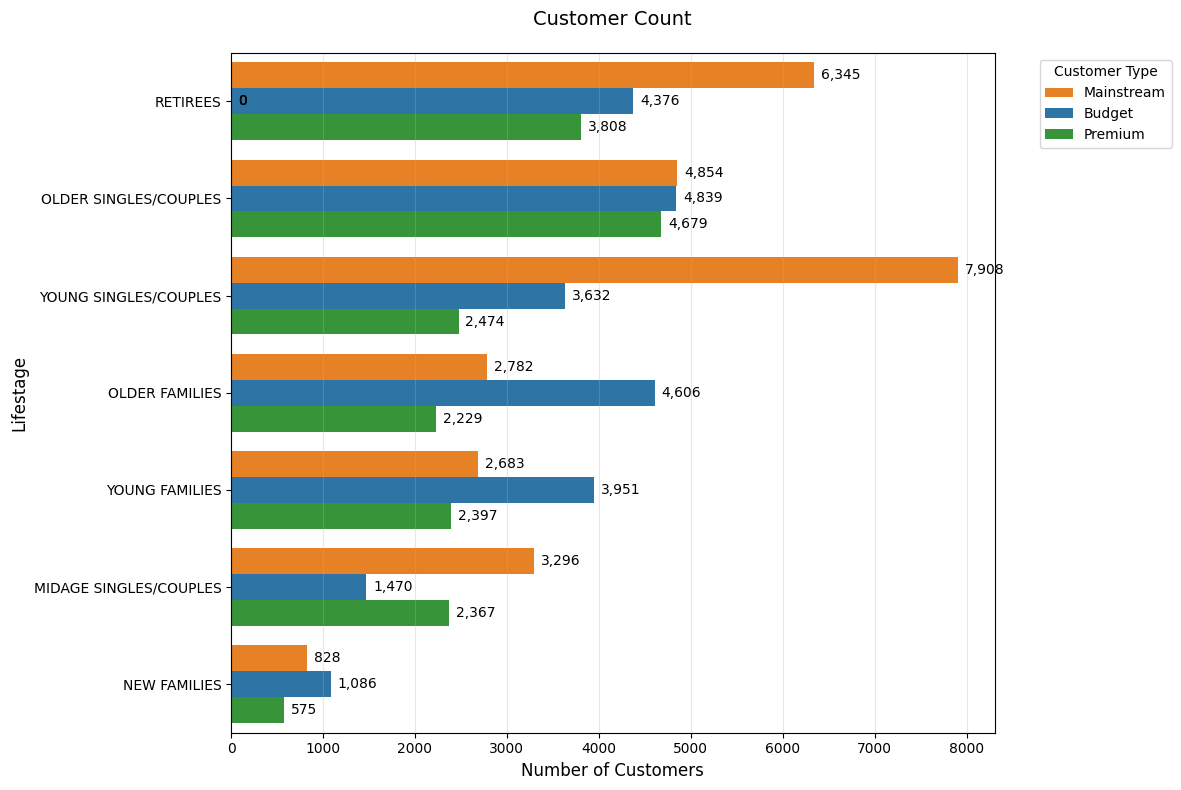

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Create a horizontal bar plot
sns.barplot(
    data=segment_counts,
    y='LIFESTAGE',
    x='CUSTOMER_COUNT',
    hue='PREMIUM_CUSTOMER',
    order=segment_counts.groupby('LIFESTAGE')['CUSTOMER_COUNT'].sum().sort_values(ascending=False).index,
    palette={'Budget':'#1f77b4', 'Mainstream':'#ff7f0e', 'Premium':'#2ca02c'},
    saturation=0.8
)

# Add value labels
for p in plt.gca().patches:
    width = p.get_width()
    plt.gca().annotate(
        f'{int(width):,}',
        (width, p.get_y() + p.get_height()/2.),
        ha='left', va='center',
        xytext=(5, 0),
        textcoords='offset points'
    )

plt.title('Customer Count', pad=20, fontsize=14)
plt.xlabel('Number of Customers', fontsize=12)
plt.ylabel('Lifestage', fontsize=12)
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

There are more Mainstream young singles/couples and Mainstream retirees who buy chips. This contributes to more sales in these customer segments, however, the number of Older families customers is not a major driver for Budget segment.

Higher sales may also be driven by more units of chips being bought per customer. Let’s have a look at this next.

In [296]:
#How many chips are bought per customer by segment

customer_totals = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_chips=('PROD_QTY', 'sum')
).reset_index().sort_values('total_chips', ascending=False)

print(customer_totals)

                 LIFESTAGE PREMIUM_CUSTOMER  total_chips
6           OLDER FAMILIES           Budget        41558
13                RETIREES       Mainstream        37488
19   YOUNG SINGLES/COUPLES       Mainstream        36095
15          YOUNG FAMILIES           Budget        34264
9    OLDER SINGLES/COUPLES           Budget        32670
10   OLDER SINGLES/COUPLES       Mainstream        32392
11   OLDER SINGLES/COUPLES          Premium        31545
12                RETIREES           Budget        26805
7           OLDER FAMILIES       Mainstream        25668
14                RETIREES          Premium        23157
16          YOUNG FAMILIES       Mainstream        23033
1   MIDAGE SINGLES/COUPLES       Mainstream        21123
17          YOUNG FAMILIES          Premium        20749
8           OLDER FAMILIES          Premium        20107
18   YOUNG SINGLES/COUPLES           Budget        15379
2   MIDAGE SINGLES/COUPLES          Premium        14327
20   YOUNG SINGLES/COUPLES     

<Figure size 1400x800 with 0 Axes>

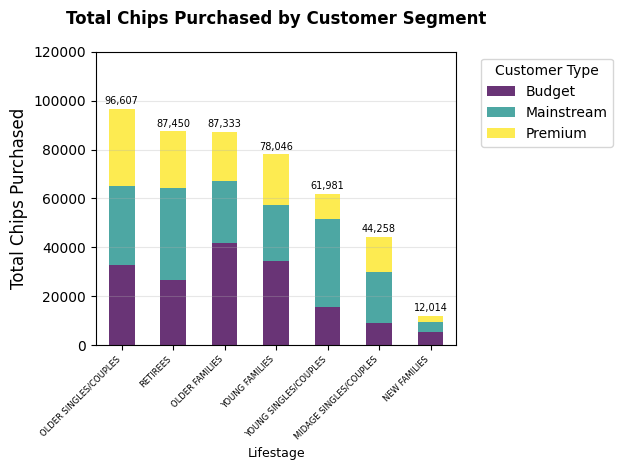

In [297]:
# Create pivot table
pivot_data = customer_totals.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='total_chips')

# Sort by total chips
pivot_data = pivot_data.reindex(pivot_data.sum(axis=1).sort_values(ascending=False).index)

# Create stacked bar chart
plt.figure(figsize=(14, 8))
ax = pivot_data.plot(kind='bar', stacked=True, colormap='viridis', alpha=0.8)
ax.set_ylim(0, 120000)

plt.title('Total Chips Purchased by Customer Segment', fontsize=12, fontweight='bold', pad=20)
plt.xlabel('Lifestage', fontsize=9)
plt.ylabel('Total Chips Purchased', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# Add total labels on top of bars
for i, total in enumerate(pivot_data.sum(axis=1)):
    plt.text(i, total + 1000, f'{total:,.0f}', ha='center', va='bottom',
            fontsize=7)

plt.tight_layout()
plt.show()

In [298]:
# Calculate average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_units=('PROD_QTY', 'sum'),
    unique_customers=('LYLTY_CARD_NBR', 'nunique')
).reset_index()

avg_units['AVG'] = avg_units['total_units'] / avg_units['unique_customers']
avg_units = avg_units.sort_values('AVG', ascending=False)

print("Average units per customer by segment:")
print(avg_units[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG']].round(2))

Average units per customer by segment:
                 LIFESTAGE PREMIUM_CUSTOMER   AVG
7           OLDER FAMILIES       Mainstream  9.23
6           OLDER FAMILIES           Budget  9.02
8           OLDER FAMILIES          Premium  9.02
15          YOUNG FAMILIES           Budget  8.67
17          YOUNG FAMILIES          Premium  8.66
16          YOUNG FAMILIES       Mainstream  8.58
9    OLDER SINGLES/COUPLES           Budget  6.75
11   OLDER SINGLES/COUPLES          Premium  6.74
10   OLDER SINGLES/COUPLES       Mainstream  6.67
1   MIDAGE SINGLES/COUPLES       Mainstream  6.41
12                RETIREES           Budget  6.13
14                RETIREES          Premium  6.08
2   MIDAGE SINGLES/COUPLES          Premium  6.05
0   MIDAGE SINGLES/COUPLES           Budget  5.99
13                RETIREES       Mainstream  5.91
4             NEW FAMILIES       Mainstream  4.88
3             NEW FAMILIES           Budget  4.80
5             NEW FAMILIES          Premium  4.80
19   YOUNG 

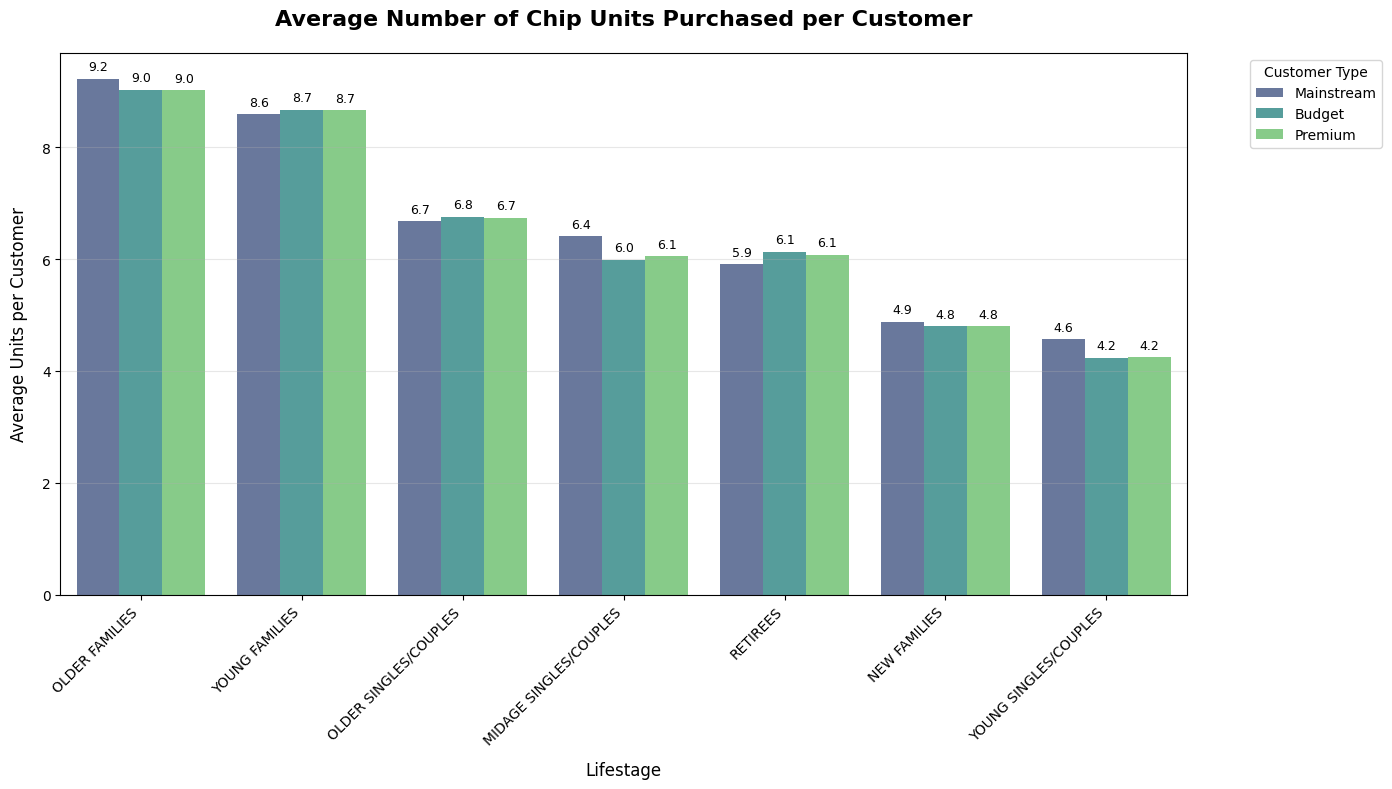

In [299]:
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_units, x='LIFESTAGE', y='AVG', hue='PREMIUM_CUSTOMER',
            palette='viridis', alpha=0.8, saturation=0.8)

plt.xlabel('Lifestage', fontsize=12, labelpad=10)
plt.ylabel('Average Units per Customer', fontsize=12, labelpad=10)
plt.title('Average Number of Chip Units Purchased per Customer',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, container in enumerate(plt.gca().containers):
    for j, bar in enumerate(container):
        height = bar.get_height()
        if not np.isnan(height):
            plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Older families and young families in general buy more chips per customer.


Let’s also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

In [300]:
# Calculate average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    total_sales=('TOT_SALES', 'sum'),
    total_units=('PROD_QTY', 'sum')
).reset_index()

avg_price['AVG'] = avg_price['total_sales'] / avg_price['total_units']
avg_price = avg_price.sort_values('AVG', ascending=False)

print("Average price per unit by segment:")
print(avg_price[['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG']].round(3))

Average price per unit by segment:
                 LIFESTAGE PREMIUM_CUSTOMER    AVG
19   YOUNG SINGLES/COUPLES       Mainstream  4.079
1   MIDAGE SINGLES/COUPLES       Mainstream  4.000
4             NEW FAMILIES       Mainstream  3.942
3             NEW FAMILIES           Budget  3.939
12                RETIREES           Budget  3.939
14                RETIREES          Premium  3.930
11   OLDER SINGLES/COUPLES          Premium  3.904
9    OLDER SINGLES/COUPLES           Budget  3.896
5             NEW FAMILIES          Premium  3.891
13                RETIREES       Mainstream  3.859
10   OLDER SINGLES/COUPLES       Mainstream  3.831
2   MIDAGE SINGLES/COUPLES          Premium  3.787
15          YOUNG FAMILIES           Budget  3.769
17          YOUNG FAMILIES          Premium  3.768
0   MIDAGE SINGLES/COUPLES           Budget  3.764
6           OLDER FAMILIES           Budget  3.756
7           OLDER FAMILIES       Mainstream  3.742
16          YOUNG FAMILIES       Mainstream  3.

/tmp/ipython-input-217630308.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(data=avg_price, x='LIFESTAGE', y='AVG', hue='PREMIUM_CUSTOMER',


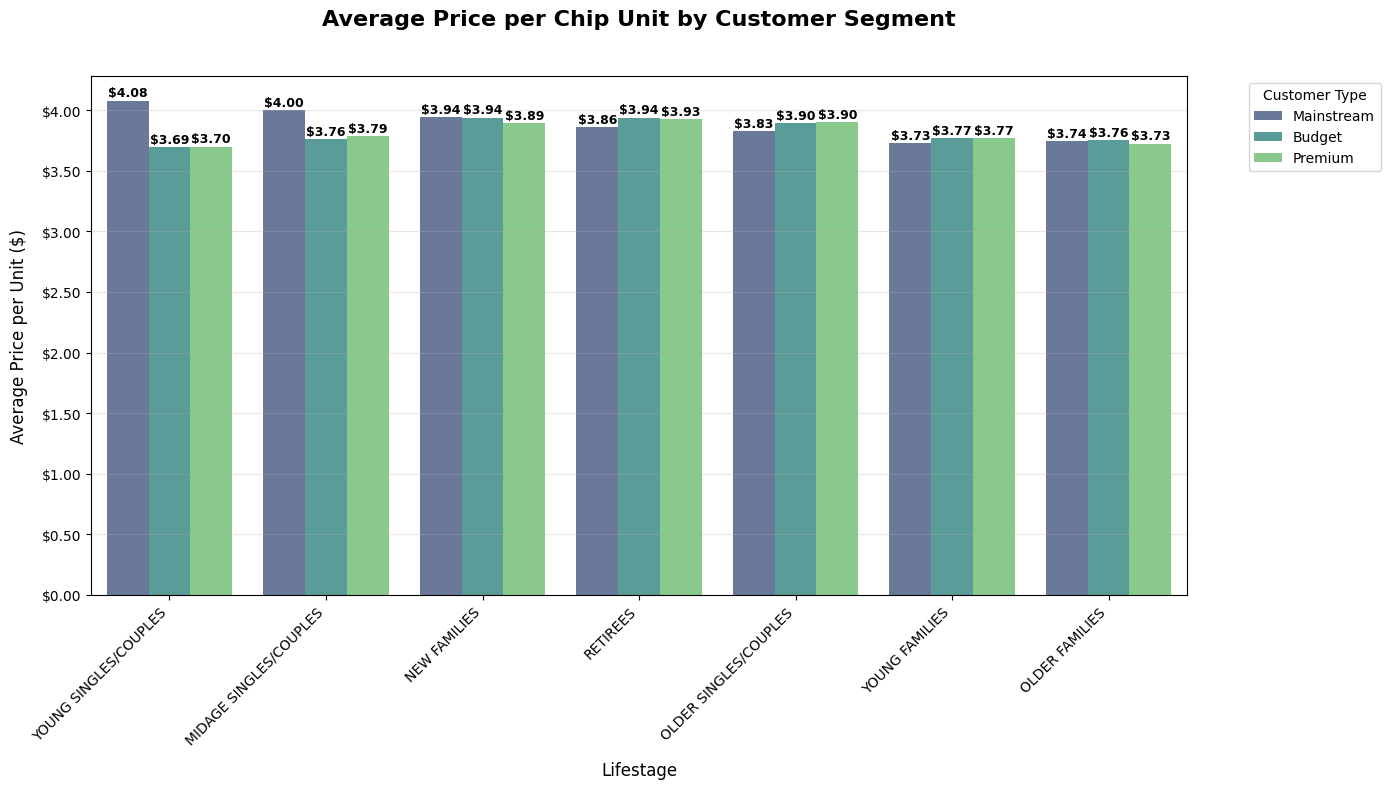

In [301]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=avg_price, x='LIFESTAGE', y='AVG', hue='PREMIUM_CUSTOMER',
                 palette='viridis', alpha=0.8, errwidth=0)

plt.xlabel('Lifestage', fontsize=12, labelpad=10)
plt.ylabel('Average Price per Unit ($)', fontsize=12, labelpad=10)
plt.title('Average Price per Chip Unit by Customer Segment\n',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', alpha=0.3)

# Format y-axis to show dollar signs
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.2f}'))

# Add value labels with better positioning
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if not np.isnan(height):
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01,
                    f'${height:.2f}', ha='center', va='bottom',
                    fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to
buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples
buying chips compared to their mainstream counterparts.

# T-test

As the difference in average price per unit isn’t large, we can check if this difference is statistically different.

Why t-test is appropriate here? The analysis asks: "Do mainstream customers pay higher prices than non-mainstream customers?" This is a comparison of means between two independent groups.

Key Characteristics that justify t-test:
- Two independent groups: Mainstream vs Non-mainstream (Budget + Premium)

- Continuous data: Price per unit is a continuous variable

- Comparison of means: Testing if one group's average price is greater than the other's

- One-tailed test: Specifically testing if mainstream pays "greater" than non-mainstream

In [302]:
from scipy import stats

# Calculate price per unit
data = merged_df.copy()
data['price'] = data['TOT_SALES'] / data['PROD_QTY']

# Define the lifestages and customer types for the test
target_lifestages = ["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]

# Create the two groups for t-test
mainstream_group = data[
    (data['LIFESTAGE'].isin(target_lifestages)) &
    (data['PREMIUM_CUSTOMER'] == "Mainstream")
]['price']

non_mainstream_group = data[
    (data['LIFESTAGE'].isin(target_lifestages)) &
    (data['PREMIUM_CUSTOMER'] != "Mainstream")  # This includes both Budget and Premium
]['price']

# Perform the independent t-test (one-tailed: greater)
t_stat, p_value = stats.ttest_ind(mainstream_group, non_mainstream_group,
                                  alternative='greater', equal_var=False)

print("T-Test Results: Mainstream vs Non-Mainstream")
print("=" * 50)
print(f"Mainstream group size: {len(mainstream_group)}")
print(f"Non-Mainstream group size: {len(non_mainstream_group)}")
# Degrees of freedom represents the number of independent pieces of information available to estimate a parameter
print(f"df (degrees of freedom) = {len(mainstream_group)+ len(non_mainstream_group) - 2}")
print(f"Mainstream mean price (x): ${mainstream_group.mean():.3f}")
print(f"Non-Mainstream mean price (y): ${non_mainstream_group.mean():.3f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value (one-tailed): {p_value:.6f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("\nResult: SIGNIFICANT - Mainstream customers pay significantly higher prices")
    print(f"(p < {alpha}, one-tailed t-test)")
else:
    print("\nResult: NOT SIGNIFICANT - No significant price difference")
    print(f"(p = {p_value:.4f}, one-tailed t-test)")

T-Test Results: Mainstream vs Non-Mainstream
Mainstream group size: 30520
Non-Mainstream group size: 26540
df (degrees of freedom) = 57058
Mainstream mean price (x): $4.045
Non-Mainstream mean price (y): $3.714
T-statistic: 37.3005
P-value (one-tailed): 0.000000

Result: SIGNIFICANT - Mainstream customers pay significantly higher prices
(p < 0.05, one-tailed t-test)


**Breaking down the result**

Student's T-Test (Equal Variances Assumed)
`t = (X̄₁ - X̄₂) / [sₚ × √(1/n₁ + 1/n₂)]`

Pooled Standard Deviation:
`sₚ = √[((n₁ - 1)s₁² + (n₂ - 1)s₂²) / (n₁ + n₂ - 2)]`

t = 40.61
mean of x = 4.045586  (Mainstream)
mean of y = 3.688165  (Non-Mainstream)

The numerator would be:
4.045586 - 3.688165 = 0.357421

The t-test results in a **p-value <  0.05**, i.e. the unit price for mainstream, young and mid-age singles and
couples are **significantly higher** than that of budget or premium, young and midage singles and couples.

# Specific customer segments insights

We have found quite a few interesting insights that we can dive deeper into.
We might want to target customer segments that contribute the most to sales to retain them or further
increase sales.

Let’s look at Mainstream - young singles/couples. For instance, let’s find out if they tend to
buy a particular brand of chips.

In [303]:

# ---- Step 1: Split segment and other ----
segment1 = merged_df[
    (merged_df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") &
    (merged_df['PREMIUM_CUSTOMER'] == "Mainstream")
]

other = merged_df[
    ~((merged_df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") &
      (merged_df['PREMIUM_CUSTOMER'] == "Mainstream"))
]

# ---- Step 2: Total quantities ----
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

# ---- Step 3: Brand proportions ----
quantity_segment1_by_brand = (
    segment1.groupby('BRAND')['PROD_QTY']
    .sum()
    .reset_index()
    .assign(targetSegment=lambda d: d['PROD_QTY'] / quantity_segment1)
    .drop(columns='PROD_QTY')
)

quantity_other_by_brand = (
    other.groupby('BRAND')['PROD_QTY']
    .sum()
    .reset_index()
    .assign(other=lambda d: d['PROD_QTY'] / quantity_other)
    .drop(columns='PROD_QTY')
)

# ---- Step 4: Merge + affinity ----
brand_proportions = (
    pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, on='BRAND')
    .assign(affinityToBrand=lambda d: d['targetSegment'] / d['other'])
    .sort_values('affinityToBrand', ascending=False)
)

brand_proportions

,BRAND,targetSegment,other,affinityToBrand
18,Tyrrells,0.031666,0.025846,1.225194
17,Twisties,0.046350,0.038103,1.216439
4,Doritos,0.123203,0.101679,1.211684
8,Kettle,0.198698,0.166543,1.193072
16,Tostitos,0.045574,0.038205,1.192889
11,Pringles,0.119850,0.101236,1.183867
3,Cobs,0.044798,0.039282,1.140424
7,Infuzions,0.064912,0.057406,1.130757
15,Thins,0.060590,0.057327,1.056921
6,Grain Waves,0.032830,0.031374,1.046396


We can see that:

• Mainstream young singles/couples are 22% more likely to purchase Tyrrells chips compared to the rest of the population

• Mainstream young singles/couples are 56% less likely to purchase Other (Burger Rings) compared to the rest of the population

Let’s also find out if our target segment tends to buy larger packs of chips.

In [305]:
# Calculate proportions and merge
pack_proportions = (
    segment1.groupby('PACK_SIZE')['PROD_QTY'].sum() / segment1['PROD_QTY'].sum()
).reset_index(name='targetSegment').merge(
    other.groupby('PACK_SIZE')['PROD_QTY'].sum() / other['PROD_QTY'].sum(),
    on='PACK_SIZE'
).rename(columns={'PROD_QTY': 'other'})

# Calculate affinity and sort
pack_proportions['affinityToPack'] = pack_proportions['targetSegment'] / pack_proportions['other']

pack_proportions.sort_values('affinityToPack', ascending=False)


,PACK_SIZE,targetSegment,other,affinityToPack
17,270.0,0.031943,0.025246,1.265291
19,380.0,0.032276,0.025737,1.254060
14,210.0,0.015515,0.012676,1.223911
18,330.0,0.061504,0.050462,1.218831
4,134.0,0.119850,0.101236,1.183867
2,110.0,0.106663,0.090328,1.180841
5,135.0,0.014822,0.013154,1.126843
16,250.0,0.014406,0.012857,1.120513
9,170.0,0.081064,0.081470,0.995014
6,150.0,0.150519,0.152168,0.989163


It looks like Mainstream young singles/couples are 26% more likely to purchase a 270g pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.

In [306]:
merged_df[merged_df['PACK_SIZE'] == 270]['PROD_NAME'].unique()

array(['Twisties Cheese     270g', 'Twisties Chicken270g'], dtype=object)

Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of
purchasing Twisties.

# Conclusion

Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream - retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees
is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.


We’ve also found that Mainstream young singles and couples are 22% more likely to purchase Tyrrells chips compared to the rest of the population.


The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.